In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Cargar data

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data = pd.read_csv(url, header=0)


In [3]:
data['Month'] = pd.to_datetime(data['Month'])

In [4]:
data.set_index('Month', inplace=True)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data['Sunspots'].values.reshape(-1,1))

In [6]:
def create_sequence(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [7]:
seq_length = 10
x, y = create_sequence(data_scaled, seq_length)

In [8]:
# Dividir en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# Implementar la Red Neuronal Feed Forward (Red Simple)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Crear la Red Neuronal Feed Forward
model_ffnn = Sequential([
    Flatten(input_shape=(seq_length,)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model_ffnn.compile(optimizer='adam', loss='mse')
model_ffnn.summary()

# Entrenar la red
history_ffnn = model_ffnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


2024-08-19 16:18:11.100281: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 16:18:11.294829: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 16:18:12.110223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-19 16:18:13.470627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  su

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,201 (24.22 KB)

 Trainable params: 6,201 (24.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216 - val_loss: 0.0042
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_lo

# Implementar la Red Neuronal Recurrente (RNN)

In [10]:
from tensorflow.keras.layers import SimpleRNN

# Crear la Red Neuronal Recurrente
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.summary()

# Entrenar la red
history_rnn = model_rnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


/home/arg/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0171 - val_loss: 0.0045
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0049
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_lo

# Evaluar y Comparar los Resultados

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.0039
Feed Forward NN Test Loss: 0.004233477637171745
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 
RNN Test Loss: 0.004245927557349205


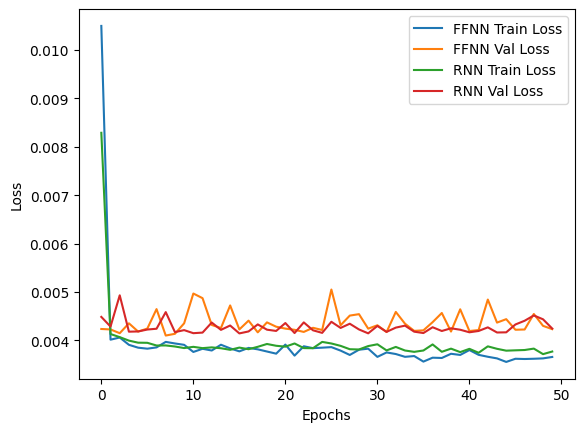

In [11]:
# Evaluar la Red Feed Forward
loss_ffnn = model_ffnn.evaluate(x_test, y_test)
print(f'Feed Forward NN Test Loss: {loss_ffnn}')

# Evaluar la RNN
loss_rnn = model_rnn.evaluate(x_test, y_test)
print(f'RNN Test Loss: {loss_rnn}')

# Graficar las pérdidas durante el entrenamiento
plt.plot(history_ffnn.history['loss'], label='FFNN Train Loss')
plt.plot(history_ffnn.history['val_loss'], label='FFNN Val Loss')
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predecir en el conjunto de prueba
y_pred_ffnn = model_ffnn.predict(x_test)
y_pred_rnn = model_rnn.predict(x_test)

# Calcular MSE y MAE para FFNN
mse_ffnn = mean_squared_error(y_test, y_pred_ffnn)
mae_ffnn = mean_absolute_error(y_test, y_pred_ffnn)

# Calcular MSE y MAE para RNN
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

print(f'FFNN Mean Squared Error: {mse_ffnn}')
print(f'FFNN Mean Absolute Error: {mae_ffnn}')
print(f'RNN Mean Squared Error: {mse_rnn}')
print(f'RNN Mean Absolute Error: {mae_rnn}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
FFNN Mean Squared Error: 0.004233477945692506
FFNN Mean Absolute Error: 0.047219453991308565
RNN Mean Squared Error: 0.004245927533750801
RNN Mean Absolute Error: 0.046212553464276176
